# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [255]:
pip install palmerpenguins


In [256]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV



In [257]:
from palmerpenguins import load_penguins
import pandas as pd


penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [258]:
penguins = penguins.dropna()
penguins_dummified = pd.get_dummies(penguins, columns=['island', 'sex', 'year'])
penguins_dummified.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male,year_2007,year_2008,year_2009
0,Adelie,39.1,18.7,181.0,3750.0,False,False,True,False,True,True,False,False
1,Adelie,39.5,17.4,186.0,3800.0,False,False,True,True,False,True,False,False
2,Adelie,40.3,18.0,195.0,3250.0,False,False,True,True,False,True,False,False
4,Adelie,36.7,19.3,193.0,3450.0,False,False,True,True,False,True,False,False
5,Adelie,39.3,20.6,190.0,3650.0,False,False,True,False,True,True,False,False


Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [259]:
X = penguins_dummified.drop(columns=['species'])
y = penguins_dummified['species']

In [260]:
dt = DecisionTreeClassifier(max_depth=2)

dt

DecisionTreeClassifier(max_depth=2)

In [261]:
dt.fit(X, y)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[2] <= 206.5\ngini = 0.638\nsamples = 333\nvalue = [146, 68, 119]'),
 Text(0.25, 0.5, 'x[0] <= 43.35\ngini = 0.429\nsamples = 208\nvalue = [144.0, 63.0, 1.0]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.067\nsamples = 145\nvalue = [140, 5, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.148\nsamples = 63\nvalue = [4, 58, 1]'),
 Text(0.75, 0.5, 'x[4] <= 0.5\ngini = 0.107\nsamples = 125\nvalue = [2, 5, 118]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.408\nsamples = 7\nvalue = [2, 5, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 118\nvalue = [0, 0, 118]')]

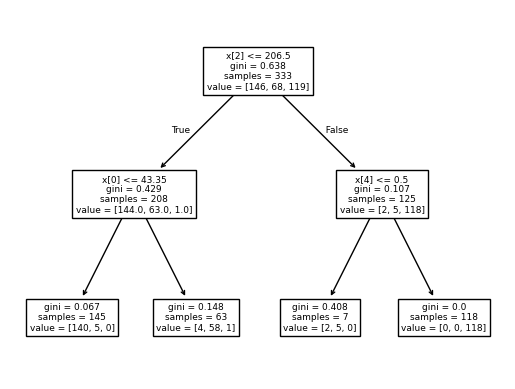

In [262]:
from sklearn.tree import plot_tree

plot_tree(dt)

In [263]:
from sklearn.neighbors import KNeighborsClassifier


In [264]:
numeric_cols = X.select_dtypes(include="number").columns
categorical_cols = X.select_dtypes(exclude="number").columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(), categorical_cols)
    ]
)


In [265]:
pipe_knn = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("knn", KNeighborsClassifier())
])


In [266]:
param_grid_knn = {
    "knn__n_neighbors": [3, 5, 7, 9, 11, 13, 15]
    }

grid_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=5, scoring="accuracy")
grid_knn.fit(X, y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         Index(['island_Biscoe', 'island_Dream', 'island_Torgersen', 'sex_female',
       'sex_male', 'year_2007', 'year_2008', 'year_2009'],
      dtype='object'))])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15]},
             scoring='accuracy')

In [267]:
pipe_knn1 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("knn", KNeighborsClassifier(n_neighbors=5))
])

pipe_knn1.fit(X, y)
y_pred_knn1 = pipe_knn1.predict(X)

In [268]:
pipe_knn2 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("knn", KNeighborsClassifier(n_neighbors=13))
])

pipe_knn2.fit(X, y)
y_pred_knn2 = pipe_knn2.predict(X)

# Decision Tree

In [269]:
pipe_tree = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("tree", DecisionTreeClassifier())
])

In [270]:
param_grid_tree = {
    "tree__max_depth": [1, 3, 7, 9, 11, 13],
}

grid_tree = GridSearchCV(pipe_tree, param_grid_tree, cv=5, scoring="accuracy")
grid_tree.fit(X, y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         Index(['island_Biscoe', 'island_Dream', 'island_Torgersen', 'sex_female',
       'sex_male', 'year_2007', 'year_2008', 'year_2009'],
      dtype='object'))])),
                                       ('tree', DecisionTreeClassifier())]),
             param_grid={'tree__max_depth': [1, 3, 7, 9, 11, 13]},
             scoring='accuracy')

In [271]:
dt1 = DecisionTreeClassifier(max_depth=2)

dt1

DecisionTreeClassifier(max_depth=2)

In [272]:
dt1_fit = dt1.fit(X, y)
y_pred_tree1 = dt1.predict(X)

In [273]:
dt2 = DecisionTreeClassifier(max_depth=11)

dt2

DecisionTreeClassifier(max_depth=11)

In [274]:
dt2.fit(X, y)
y_pred_tree2 = dt2.predict(X)

In [275]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y, y_pred_knn1)

array([[145,   1,   0],
       [  1,  67,   0],
       [  0,   0, 119]])

In [276]:
confusion_matrix(y, y_pred_knn2)


array([[145,   1,   0],
       [  2,  66,   0],
       [  0,   0, 119]])

In [277]:
confusion_matrix(y, y_pred_tree1)


array([[140,   6,   0],
       [  5,  63,   0],
       [  0,   1, 118]])

In [278]:
confusion_matrix(y, y_pred_tree2)

array([[146,   0,   0],
       [  0,  68,   0],
       [  0,   0, 119]])

In [279]:
print(classification_report(y, y_pred_knn1))

              precision    recall  f1-score   support

      Adelie       0.99      0.99      0.99       146
   Chinstrap       0.99      0.99      0.99        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           0.99       333
   macro avg       0.99      0.99      0.99       333
weighted avg       0.99      0.99      0.99       333



In [280]:
from sklearn.metrics import roc_auc_score, auc

y_pred_proba = pipe_knn1.predict_proba(X)

auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')
auc


np.float64(0.9999232322925176)

In [281]:
print(classification_report(y, y_pred_knn2))

              precision    recall  f1-score   support

      Adelie       0.99      0.99      0.99       146
   Chinstrap       0.99      0.97      0.98        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           0.99       333
   macro avg       0.99      0.99      0.99       333
weighted avg       0.99      0.99      0.99       333



In [282]:
y_pred_proba = pipe_knn2.predict_proba(X)

auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')
auc

np.float64(0.9998618181265316)

In [283]:
print(classification_report(y, y_pred_tree1))

              precision    recall  f1-score   support

      Adelie       0.97      0.96      0.96       146
   Chinstrap       0.90      0.93      0.91        68
      Gentoo       1.00      0.99      1.00       119

    accuracy                           0.96       333
   macro avg       0.96      0.96      0.96       333
weighted avg       0.96      0.96      0.96       333



In [284]:
y_pred_proba = dt1.predict_proba(X)

auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')
auc

np.float64(0.9828500010968431)

In [285]:
print(classification_report(y, y_pred_tree2))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       146
   Chinstrap       1.00      1.00      1.00        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333



In [286]:
y_pred_proba = dt2.predict_proba(X)

auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')
auc

np.float64(1.0)

In [287]:
y_pred_proba = dt1.predict_proba(X)

auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')
auc

np.float64(0.9828500010968431)

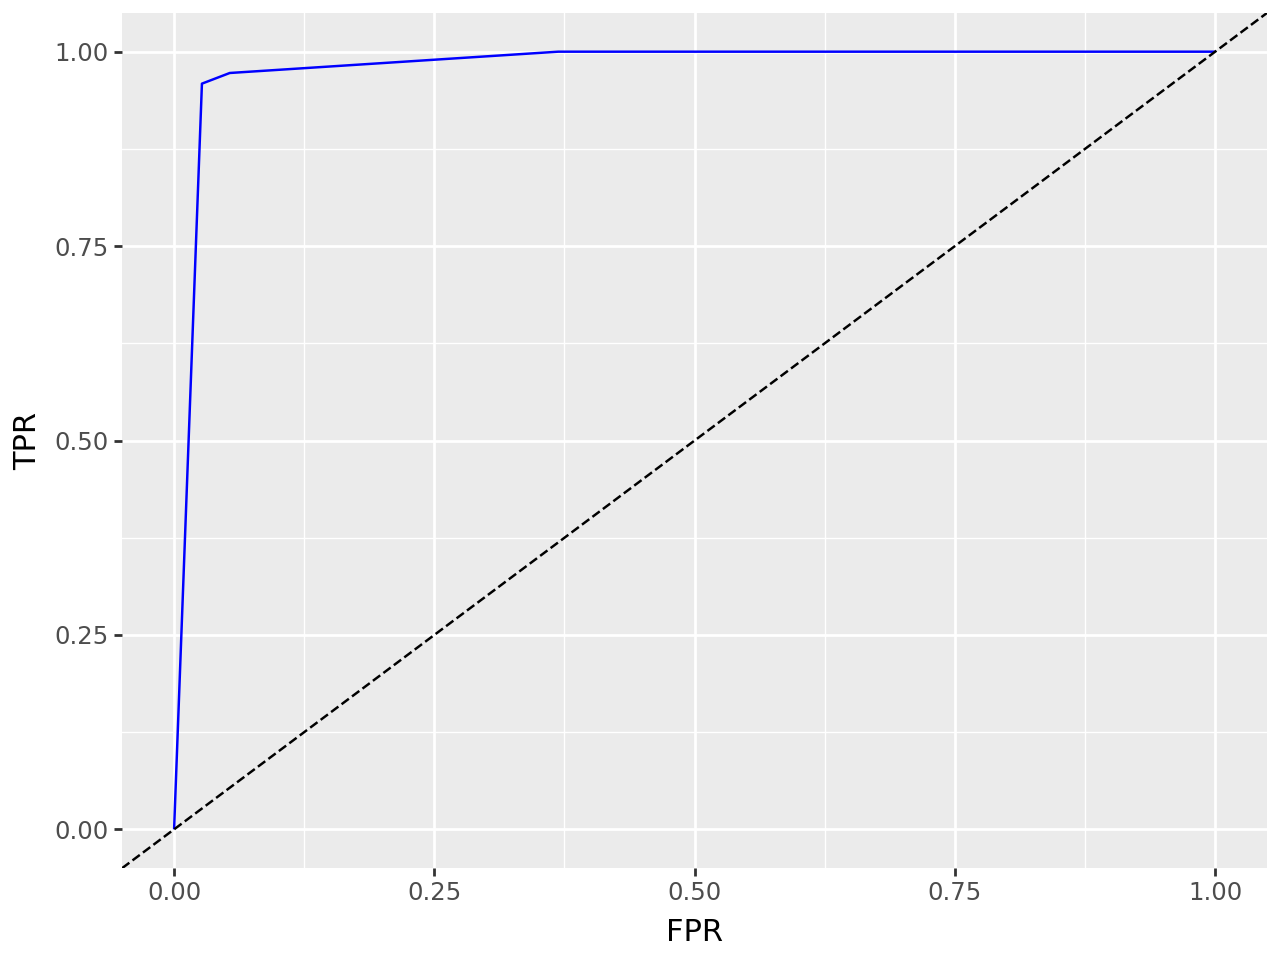

In [288]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from plotnine import *

y_bin = label_binarize(y, classes=dt1.classes_)
y_prob = dt1.predict_proba(X)

fpr, tpr, _ = roc_curve(y_bin[:, 0], y_prob[:, 0])
roc_auc = auc(fpr, tpr)

roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr})

(
    ggplot(roc_df, aes('FPR', 'TPR'))
    + geom_line(color='blue')
    + geom_abline(intercept=0, slope=1, linetype='dashed')
)

